<h1 style="text-align: center;">[Capstone Project Module 3: Hotel Booking Demand Classification Model ]</h1>
<h3 style="text-align: center;">[Alief Dharmawan]</h3>

---

## **Section 1. Business Understanding**

**1.1 Context**

"This data set contains booking information for a hotel located in Portugal, and includes information regarding room reservation for respective customers.
All personally identifying information has been removed from the data."

The data includes the following features:

country: Country of origin.

market_segment: Market segment designation. 

previous_cancellations: Number of previous bookings that were cancelled by the customer prior to the current booking.

booking_changes: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.

deposit_type: Indication on if the customer made a deposit to guarantee the booking. 

days_in_waiting_list: Number of days the booking was in the waiting list before it was confirmed to the customer.

customer_type: Type of booking.

reserved_room_type: Code of room type reserved. Code is presented instead of designation for anonymity reasons.

required_car_parking_space: Number of car parking spaces required by the customer.

total_of_special_request: Number of special requests made by the customer (e.g. twin bed or high floor).

is_canceled: Value indicating if the booking was canceled (1) or not (0).


The dataset contains booking information for a hotel in Portugal, including customer demographics, booking behaviors, and whether the reservation was canceled. Hotels often struggle with last-minute cancellations, which cause revenue loss and operational inefficiencies. By leveraging machine learning, the hotel can anticipate cancellations and take proactive measures such as overbooking or targeted customer outreach.

**1.2 Problem Statements**

In the modern day of increasing adoption of technology, Hotels need to keep up with modern technology to compete and stay in business. One thing that every hotel needs to be aware of is the OTA, or Online Travel Agency, which is a third-party website or platform that allows travelers to book accommodations, flights, car rentals, and other travel services online. These platforms act as intermediaries, connecting hotels with potential guests and offering a convenient way to search, compare, and book travel arrangements. Using these comes with it's own problems. Some common Modern Hotel Problems include: =

Digital Convenience:
Guests want easy online booking, mobile check-in/check-out, and access to information via apps or websites. 
Relevant columns: Booking changes, Deposit type, Customer Type 

Competition:
The hospitality industry is highly competitive, requiring hotels to differentiate themselves and manage pricing effectively. 
Relevant columns: previous cancellations, market segment, booking changes, days in waiting list, customer type 

Lack of Guest Information:
Incomplete or inaccurate guest information from OTAs can lead to service issues. 
Relevant columns: Required car parking space, total of special request, reserved room type, days in waiting list 

Personalization:
Guests increasingly expect personalized experiences, including tailored recommendations, customized room preferences, and seamless digital interactions. 
Relevant columns: Total of special requests, required car parking space, reserved room type 

Cancellations are an important metric for hotels to keep in mind so that they can better plan out their strategy. All of this data is to keep track and predict hotel cancellation bookings. 

The hotel experiences a substantial number of last-minute booking cancellations, leading to:
- Lost revenue from unsold rooms.
- Operational inefficiencies in room allocation and staffing.
- Distorted demand forecasting and pricing decisions.

**Core Problem:**  
How can the hotel predict the likelihood of a booking being canceled early enough to take corrective actions?


**1.3 Goals**

- Build a predictive model to estimate the probability that a booking will be canceled.
- Enable the hotel to adjust operational and revenue strategies based on predicted risk levels.
- Provide actionable insights to reduce cancellation-related losses.

**1.4 Analytical Approach**

- **Problem Type:** Binary Classification (Canceled vs. Not Canceled).
- **Target Variable:** `is_canceled` (1 = canceled, 0 = not canceled).
- **Possible Model Uses:** Logistic Regression, Random Forest, Gradient Boosting (XGBoost, LightGBM).
- **Preprocessing Steps:**  
  - Handle missing values.  
  - Encode categorical features (`market_segment`, `deposit_type`, etc.).  
  - Feature engineering (e.g., booking season, lead time categories).  
  - Scale/normalize numerical variables if needed.

**1.5 Metric Evaluation (Business Metric, Machine Learning Evaluation Metric)**

### Business Metric
- **Reduction in revenue loss from cancellations** - measured by comparing historical cancellation rates to projected rates after implementing the predictive model.
- **Operational efficiency gains** - e.g., reduced overstaffing or unused room inventory.

### Machine Learning Evaluation Metric
- **Primary Metric:** Recall on the "canceled" class - to maximize detection of likely cancellations.
- **Secondary Metrics:**  
  - F1-score - balance precision and recall.  
  - ROC AUC - assess overall classification performance.

Metric selection aligns with business priority: better to flag most high-risk bookings (higher recall) even at the cost of some false positives.

**1.6 Success Criteria**

### Business Success
- At least **X%** reduction in revenue loss from last-minute cancellations.  
- Improved room occupancy rates and staff scheduling efficiency.

### Machine Learning Success
- Recall ≥ **0.80** on test data.  
- F1-score ≥ **0.75** to maintain balanced performance.

## **Section 2. Data Understanding**

**2.1 General Information**


- **Dataset**: Hotel Booking Demand - booking records from a hotel in Portugal.
- **Shape**: 83,573 rows × 11 columns.
- **Data Types**:  
  - Numeric (5): `previous_cancellations`, `booking_changes`, `required_car_parking_spaces`, `total_of_special_requests`, `days_in_waiting_list`
  - Categorical (5): `market_segment`, `deposit_type`, `customer_type`, `reserved_room_type`, `country`
- **Target Variable**: `is_canceled` - 1 if booking canceled, 0 otherwise.

###  Library Imports

In [147]:
# Data Manipulation Library Imports

import pandas as pd
import numpy as np

In [148]:
# Data Visualization Library Imports


import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
# Machine Learning Library Imports


# Feature Engineering Library Imports
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.base import BaseEstimator, TransformerMixin

# Model Selection Library Imports
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import make_scorer, average_precision_score




In [150]:
# Other Library Imports

#for seeding and reproducibility
import random 

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [151]:
#Load Dataset
df = pd.read_csv(r"C:\Users\Alief\Downloads\Purwadhika Data Science Program\Module 3 Machine Learning\Capstone Project Module 3\data_hotel_booking_demand.csv")
df

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


In [152]:
#Checking the memory the dataset uses
mem_usage_mb = df.memory_usage(deep=True).sum() / (1024**2)
print(f"Dataset uses approximately {mem_usage_mb:.2f} MB of memory")


Dataset uses approximately 25.99 MB of memory


In [153]:
# Reproducibility - For our machine learning models ahead, we will set the random seed to 42. Random state will be set to SEED from now on. 
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

**2.2 Feature Information**


| Feature | Description | Impact to Business |
|---------|-------------|--------------------|
| country | Country of origin. | Identifies key markets; may reveal geographic patterns in cancellations. |
| market_segment | Market segment designation. | Helps target marketing efforts and adjust offerings based on booking source. |
| previous_cancellations | Number of previous bookings canceled by the customer prior to the current booking. | Strong indicator of customer reliability; high values may predict future cancellations. |
| booking_changes | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation. | Frequent changes may indicate uncertainty and higher cancellation risk. |
| deposit_type | Indication on if the customer made a deposit to guarantee the booking. | Certain deposit types may reduce cancellations; impacts pricing and refund policy. |
| days_in_waiting_list | Number of days the booking was in the waiting list before it was confirmed to the customer. | Long waits might increase cancellation likelihood; affects booking management. |
| customer_type | Type of booking. | Different customer types may have distinct booking behaviors and cancellation rates. |
| reserved_room_type | Code of room type reserved. Code is presented instead of designation for anonymity reasons. | Mismatch between reserved and assigned room can lead to dissatisfaction; affects customer experience. |
| required_car_parking_space | Number of car parking spaces required by the customer. | May indicate local vs. international guests; impacts facility planning. |
| total_of_special_request | Number of special requests made by the customer (e.g. twin bed or high floor). | High requests may indicate high-value customers; may also correlate with satisfaction or cancellations. |
| is_canceled | Value indicating if the booking was canceled (1) or not (0). | Target variable; directly measures booking success vs. loss. |


**2.3 Statistics Summary**

In [154]:
df.describe()

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000
mean,0.086798,0.220897,2.330561,0.062999,0.573211,0.368277
std,0.841011,0.648635,17.673051,0.246919,0.795163,0.482340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


In [156]:
df.nunique()

country                        162
market_segment                   8
previous_cancellations          15
booking_changes                 19
deposit_type                     3
days_in_waiting_list           115
customer_type                    4
reserved_room_type              10
required_car_parking_spaces      5
total_of_special_requests        6
is_canceled                      2
dtype: int64

In [157]:
df.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


Note: Each row represents a unique hotel booking record (anonymized), including customer characteristics, booking details, and whether the booking was canceled (is_canceled)

## **Section 3. Data Cleaning**

**3.1 Missing Values**

In [158]:
# Checking missing values 
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,country,object,351,0.42,162,"[GNB, JEY]"
1,market_segment,object,0,0.00,8,"[Offline TA/TO, Direct]"
2,previous_cancellations,int64,0,0.00,15,"[1, 11]"
3,booking_changes,int64,0,0.00,19,"[12, 1]"
4,deposit_type,object,0,0.00,3,"[Refundable, Non Refund]"
5,days_in_waiting_list,int64,0,0.00,115,"[56, 48]"
6,customer_type,object,0,0.00,4,"[Transient, Transient-Party]"
7,reserved_room_type,object,0,0.00,10,"[A, F]"
8,required_car_parking_spaces,int64,0,0.00,5,"[8, 0]"
9,total_of_special_requests,int64,0,0.00,6,"[4, 2]"


Imputing missing values will create a data leakage if I impute using mode before splitting. Therefore we will just note that I have decided to impute using the mode and continue on with the rest of the data cleaning first. 
Also important to re consider whether country is a valid feature to include. Will it cause unneccessary discrimination because of nationality?

**3.2 Duplicated Values**

In [159]:
# Count duplicates
dup_cnt = df.duplicated().sum()
print(f"Duplicate rows: {dup_cnt}")
# (No action yet—just measuring. If >0, we’ll decide later whether to drop.)

Duplicate rows: 73371


“High apparent duplicates were detected, but due to the absence of a unique booking identifier, these likely represent legitimate separate bookings. Therefore, no duplicate removal was performed.”

**3.3 Identify Anomaly Values**
- Checking Feature Distribution of both Numerical and Categorical Variables
- For our numerical variables, most of them have small integer ranges  and are count based. The only columns that are noteworthy to check for distribution is days in waiting list and previous cancellations. 
- For our categorical variables, it is still useful to check the distributions for most. 

In [160]:
df.describe()

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000
mean,0.086798,0.220897,2.330561,0.062999,0.573211,0.368277
std,0.841011,0.648635,17.673051,0.246919,0.795163,0.482340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


We immediately can see that some of the numerical variables have unreasonable outliers. Being in a waiting list for over a year for eample, having unreasonable amounts of booking changes and prevoious cancellations. In terms of required car parking spots or total of special requests, I think the extresm of 8 parking spots and 5 special requests are still reasonable. 

In [161]:
# Checking target variable distribution and proportion of target data
df['is_canceled'].value_counts(normalize=True) * 100

is_canceled
0    63.172316
1    36.827684
Name: proportion, dtype: float64

We can see that it is an imbalanced distribution for those who cancelled. But it's not too bad. 63% didn't cancel while 36% did. However, this imbalance in class is not severe enough to warrant using imbalanced models. 

In [162]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

Purpose: Assess the variety of values in each column to detect potential issues (e.g., invalid categories, unusual codes) and to guide later feature encoding.

In [163]:
# Count unique values for numeric columns
nunique_numeric = df[numeric_cols].nunique().reset_index()
nunique_numeric.columns = ['Feature', 'Unique Values']
nunique_numeric

,Feature,Unique Values
0,previous_cancellations,15
1,booking_changes,19
2,days_in_waiting_list,115
3,required_car_parking_spaces,5
4,total_of_special_requests,6
5,is_canceled,2


In [164]:
invalid_counts = {}
for col in numeric_cols:
    if (df[col] < 0).any():
        invalid_counts[col] = int((df[col] < 0).sum())
invalid_counts if invalid_counts else "No negative values found in numeric columns."


'No negative values found in numeric columns.'

We can use unique values for numeric columns as all of them are integers. This is also another way to check the distribution. 

Purpose: Review numeric feature distributions to detect skewness, extreme values, and anomalies that may require transformation or capping to improve model performance.

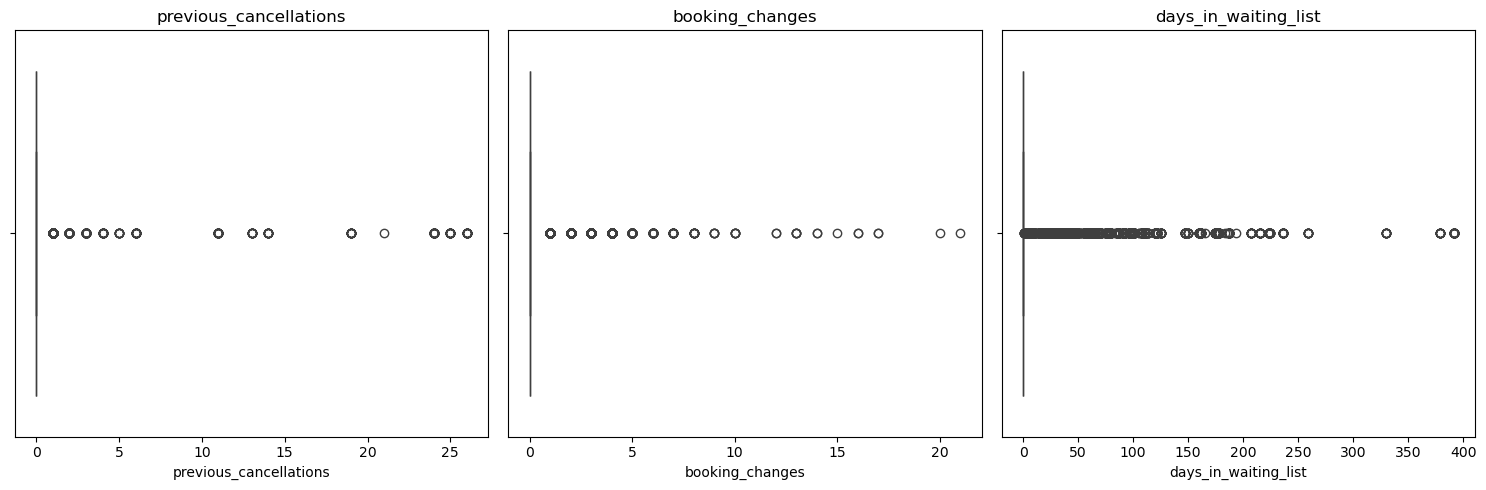

In [165]:
numeric_cols_to_plot1 = numeric_cols[:3]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, col in zip(axes, numeric_cols_to_plot1):
    sns.boxplot(x=df[col], orient="h", ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()


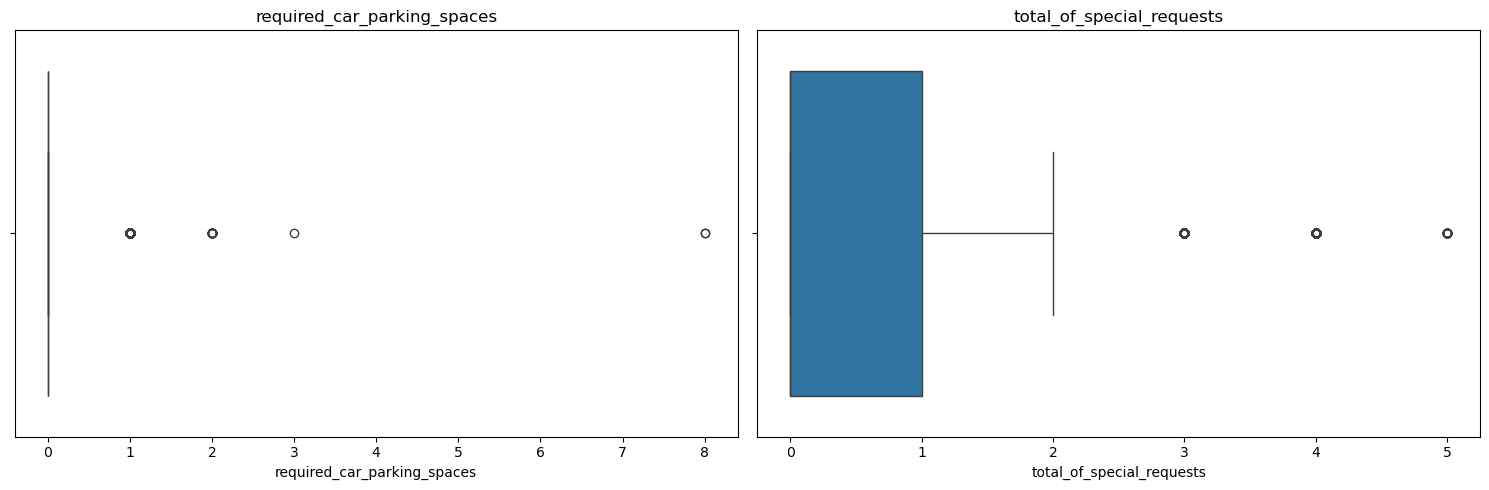

In [166]:
numeric_cols_to_plot2 = numeric_cols[-3:]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
for ax, col in zip(axes, numeric_cols_to_plot2):
    sns.boxplot(x=df[col], orient="h", ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

We can see that most of the numeric columns actually have a lot of outliers.

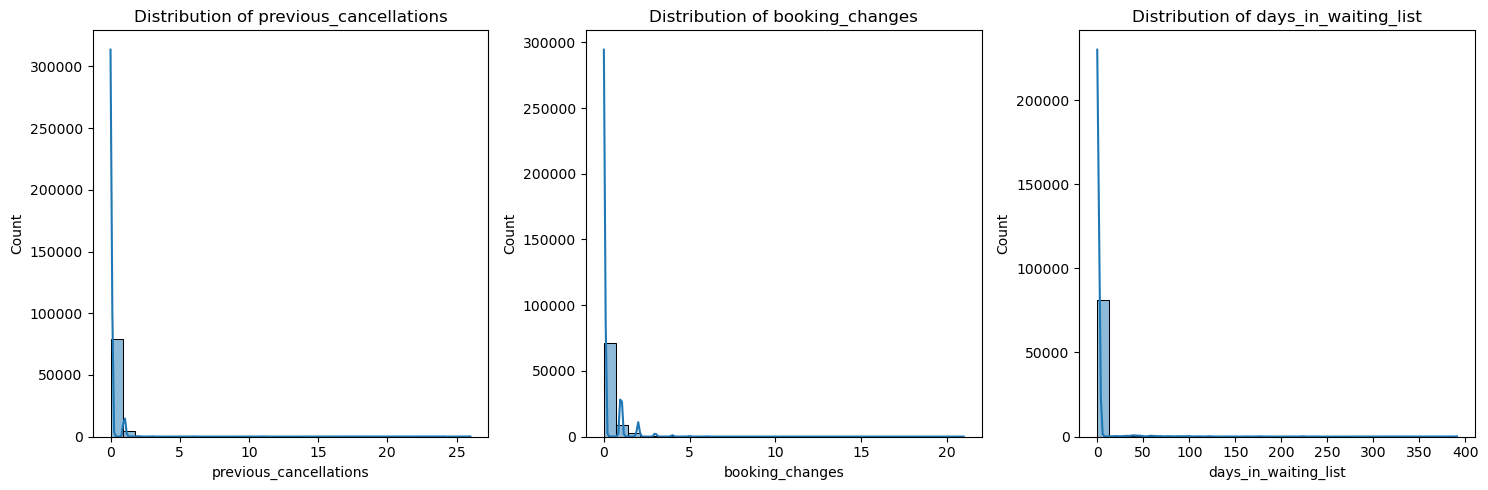

In [167]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, col in zip(axes, numeric_cols_to_plot1):
    sns.histplot(df[col], bins=30, kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

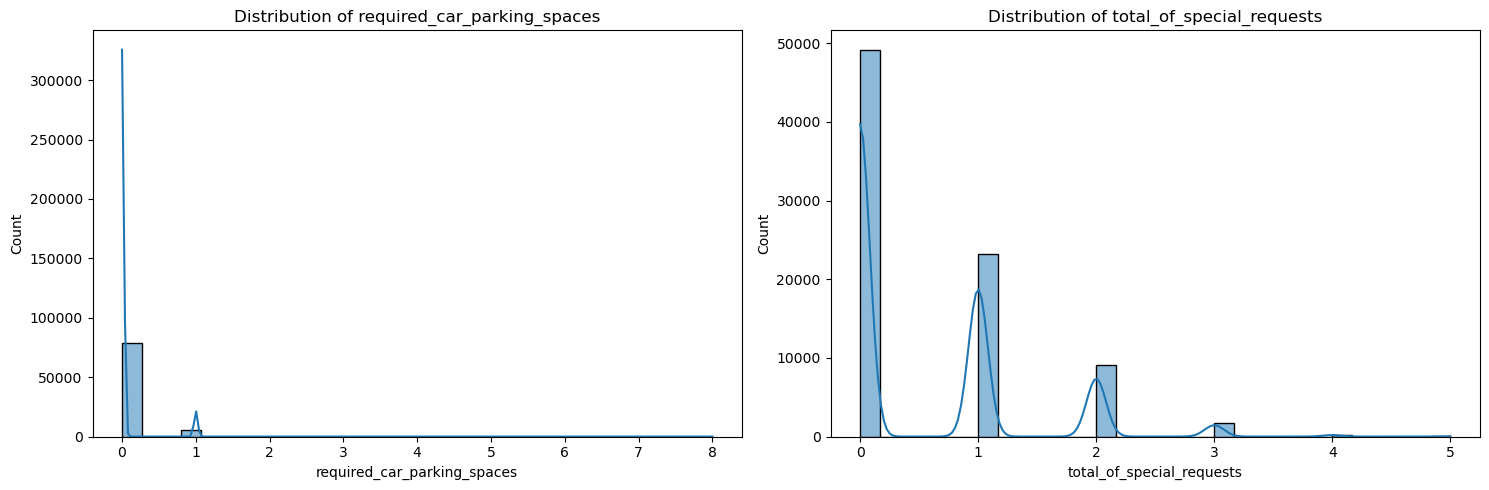

In [168]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for ax, col in zip(axes, numeric_cols_to_plot2):
    sns.histplot(df[col], bins=30, kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [169]:
# show outliers for numerical column 
lower = []
upper = []
lower_count = []
upper_count = []
outlier_proportion = []

for column in numeric_cols:
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
    lower_bound = df[column].quantile(0.25) - 1.5 * IQR
    upper_bound = df[column].quantile(0.75) + 1.5 * IQR

    lower.append(lower_bound)
    upper.append(upper_bound)
    lower_count.append(len(df[df[column] < lower_bound]))
    upper_count.append(len(df[df[column] > upper_bound]))
    outlier_proportion.append(
        round((len(df[df[column] < lower_bound]) + len(df[df[column] > upper_bound])) / len(df) * 100, 2)
    )

outliers = pd.DataFrame({
    "Numeric Columns": numeric_cols,
    "Lower Bound": lower,
    "Upper Bound": upper,
    "# Lower": lower_count,
    "# Upper": upper_count,
    "% Outlier": outlier_proportion
})

outliers

,Numeric Columns,Lower Bound,Upper Bound,# Lower,# Upper,% Outlier
0,previous_cancellations,0.0,0.0,0,4513,5.40
1,booking_changes,0.0,0.0,0,12700,15.20
2,days_in_waiting_list,0.0,0.0,0,2585,3.09
3,required_car_parking_spaces,0.0,0.0,0,5227,6.25
4,total_of_special_requests,-1.5,2.5,0,2051,2.45
5,is_canceled,-1.5,2.5,0,0,0.00


Purpose: Review categorical feature distributions to detect imbalance, dominant categories, and rare labels that may require grouping before encoding.

In [170]:
# Count unique values for categorical columns
nunique_categorical = df[categorical_cols].nunique().reset_index()
nunique_categorical.columns = ['Feature', 'Unique Values']
nunique_categorical

,Feature,Unique Values
0,country,162
1,market_segment,8
2,deposit_type,3
3,customer_type,4
4,reserved_room_type,10


Again, we see another case of where it might be beneficial to drop country as a feature. High Cardinality, which means that it has contains so much possible values making it difficult for the model to determine noise

In [171]:
# Create an empty list to store summaries
all_cat_summary = []

for col in categorical_cols:
    counts = df[col].value_counts()
    percents = df[col].value_counts(normalize=True).mul(100).round(2)
    summary_df = pd.DataFrame({
        'Column': col,
        'Category': counts.index,
        'Count': counts.values,
        'Percentage': percents.values
    }).sort_values(by='Percentage', ascending=False)  # sort within column
    summary_df = summary_df.head(10)  # limit to top 10 per column
    all_cat_summary.append(summary_df)

# Combine all into one DataFrame
categorical_summary_df = pd.concat(all_cat_summary, ignore_index=True)

categorical_summary_df


,Column,Category,Count,Percentage
0,country,PRT,34097,40.97
1,country,GBR,8495,10.21
2,country,FRA,7307,8.78
3,country,ESP,5996,7.20
4,country,DEU,5116,6.15
5,country,ITA,2658,3.19
6,country,IRL,2340,2.81
7,country,BEL,1648,1.98
8,country,BRA,1553,1.87
9,country,USA,1472,1.77


Observation: Certain categories dominate in some features (e.g., X in market_segment), while others appear very rarely. Will assess rare category handling in later cleaning steps.

Important to note that we see in the market segment feature of one row being 'Undefined'. 

Summary: Categorical profiling complete. Several columns show strong category dominance, and some categories occur very rarely. These findings will inform encoding strategy and possible category grouping during Data Cleaning.

After going through the raw data there is an important decision to make regarding of one of the features. 

For feature country there are many considerations to dropping it. 

High cardinality - country often has dozens (sometimes hundreds) of distinct values.

One-hot encoding would produce many columns, making the dataset sparse and possibly slowing down training.

Potentially low predictive power - If cancellation behavior doesn’t strongly depend on the customer’s country, it might add noise rather than signal. Some countries just have either 0% cancellation rate or 100% cancellation rate which will affect the model. 

Small sample sizes per category - Countries with very few bookings don’t provide stable patterns for the model to learn from.

Class imbalance within the feature - One country (e.g., PRT for Portugal) might dominate the data, making the rest negligible.



## **Section 4. Data Generation**

**4.1 Constructing `Seen` and `Unseen` Data**

Rationale for Seen vs Unseen (time-based or business-rule split).

Code that filters raw df into df_seen and df_unseen (still raw).

From df_seen, do train/test split only:

Section 4: define df_seen, df_unseen, then train_test_split on df_seen → yields X_train, X_test, y_train, y_test.

In Section 4 (Cells ~59–64): ensure it only builds df_seen, df_unseen, and performs the train/test split from df_seen. Remove any imputation/encoding there.

In [172]:
# Defining Features & target
TARGET = 'is_canceled'

# Defining X and y
X = df.drop(columns=TARGET)
y = df[TARGET]
print(f"Features shape: {X.shape}")
print(f"Target shape  : {y.shape}")
# Displaying columns and target

Features shape: (83573, 10)
Target shape  : (83573,)


**4.2 Constructing `Training` and `Testing` Data (from `Seen` Dataset)**

In [173]:
# Create Seen (train) and Unseen (final holdout) data splits
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,       # 20% Unseen holdout
    stratify=y,           # preserve target proportion
    random_state=SEED     # use reproducibility variable
)

print(f"Seen (train) set: {X_train.shape}, {y_train.shape}")
print(f"Unseen (test) set: {X_test.shape}, {y_test.shape}")

Seen (train) set: (66858, 10), (66858,)
Unseen (test) set: (16715, 10), (16715,)


In [174]:
# Check target distribution and sizes in both splits
train_cancel_rate = y_train.mean()
test_cancel_rate  = y_test.mean()

print(f"Train cancellation rate: {train_cancel_rate:.2%} ({y_train.sum()} / {len(y_train)})")
print(f"Test  cancellation rate: {test_cancel_rate:.2%} ({y_test.sum()} / {len(y_test)})")
print("-" * 50)
print(f"Train size: {X_train.shape[0]} rows, Test size: {X_test.shape[0]} rows")

Train cancellation rate: 36.83% (24622 / 66858)
Test  cancellation rate: 36.83% (6156 / 16715)
--------------------------------------------------
Train size: 66858 rows, Test size: 16715 rows


a 60/40 data set is not considered imbalanced here. 

In [175]:
# Display unique values for each column in X_train
for col in X_train.columns:
    unique_values = X_train[col].unique()
    print(f"{col}:\n{unique_values}\n")

country:
['PRT' 'BEL' 'FIN' 'ARE' 'FRA' 'DEU' 'AGO' 'ESP' 'CN' 'SWE' 'GBR' 'BRA'
 'PRI' 'VEN' 'USA' 'ARG' 'IRL' 'NOR' 'CYP' 'IND' 'CHE' 'NGA' 'MAR' 'HKG'
 'TUR' 'AUS' 'ITA' 'LBN' 'NLD' nan 'POL' 'ECU' 'CHN' 'ROU' 'THA' 'AUT'
 'ISR' 'VNM' 'CZE' 'EST' 'BGR' 'ISL' 'ZAF' 'DNK' 'GRC' 'SVN' 'RUS' 'UKR'
 'LUX' 'IDN' 'CUB' 'URY' 'COL' 'LVA' 'PHL' 'JPN' 'DZA' 'SGP' 'HUN' 'DMA'
 'SAU' 'IRN' 'HRV' 'PER' 'CHL' 'PAK' 'JOR' 'MEX' 'TUN' 'BEN' 'MOZ' 'BLR'
 'AZE' 'CRI' 'KOR' 'TMP' 'LTU' 'ETH' 'EGY' 'NZL' 'UZB' 'GNB' 'SVK' 'MLT'
 'SRB' 'MAC' 'MKD' 'BDI' 'TWN' 'KAZ' 'ALB' 'LBY' 'KNA' 'OMN' 'LIE' 'CPV'
 'MDV' 'CIV' 'GIB' 'MYS' 'ABW' 'MUS' 'BIH' 'GGY' 'SEN' 'KHM' 'AND' 'BHR'
 'KWT' 'SUR' 'QAT' 'GHA' 'PRY' 'ARM' 'IRQ' 'FRO' 'DOM' 'PAN' 'GEO' 'UGA'
 'LKA' 'SYR' 'MMR' 'CAF' 'ZMB' 'BOL' 'CMR' 'BGD' 'JEY' 'GAB' 'MWI' 'KIR'
 'LCA' 'MLI' 'TJK' 'SYC' 'PLW' 'BRB' 'JAM' 'TZA' 'AIA' 'RWA' 'ZWE' 'BWA'
 'GLP' 'MNE' 'LAO' 'IMN' 'UMI' 'GTM' 'CYM' 'KEN' 'TGO' 'VGB' 'COM' 'MYT'
 'BFA']

market_segment:
['Offline TA/TO' 'On

Removing country from modeling
country has very high cardinality, which would blow up the one‑hot feature space with sparse dummies and little business signal for cancellations. We exclude it from modeling to reduce noise and complexity.

In [176]:
# Columns to exclude from modeling
LEAKAGE_COLS = ["country"]  # not classic leakage, but unwanted/high-card

# Drop from both splits before building feature lists / pipelines
X_train = X_train.drop(columns=LEAKAGE_COLS, errors="ignore")
X_test  = X_test.drop(columns=LEAKAGE_COLS,  errors="ignore")

# Sanity check
assert "country" not in X_train.columns
assert "country" not in X_test.columns
print("Dropped columns:", LEAKAGE_COLS)
print("X_train shape:", X_train.shape, "| X_test shape:", X_test.shape)


Dropped columns: ['country']
X_train shape: (66858, 9) | X_test shape: (16715, 9)


**4.3 Cross-Validation Strategy (for all model selection/tuning)**

In [177]:
# 5-fold CV, stratified, shuffled, reproducible
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=SEED
)
cv

StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

## **Section 5. Exploratory Data Analysis (EDA)**

**5.1 Analysis 1**

**5.2 Analysis 2**

## **Section 6. Data Preparation**

**6.1 Content summary**

Initialize feature lists (numeric vs categorical)

Remove target/leakage columns (guardrails)

Build preprocessing: missing values -> rare-category grouping -> one‑hot (binary-safe)-> scaling

Package everything in a single ColumnTransformer for CV

In [178]:
# --- Target & guardrails ---
TARGET = "is_canceled"
LEAKAGE_COLS = ["country"]  # added known leaks here if any are identified later, in this case 'country' 

# --- Feature lists from X_train ---
features_all = [c for c in X_train.columns if c not in LEAKAGE_COLS]
features_num = X_train[features_all].select_dtypes(include=["number"]).columns.tolist()
features_cat = [c for c in features_all if c not in features_num]

print("Counts - numeric:", len(features_num), "| categorical:", len(features_cat))

Counts - numeric: 5 | categorical: 4


**6.3 Rare-category grouping helper**

Groups infrequent categories to a single label "OTHER" based only on Seen data.

In [179]:
# --- Rare category grouper ---

class RareCategoryGrouper(BaseEstimator, TransformerMixin):
    def __init__(self, min_freq=0.01, other_label="__OTHER__"):
        """
        min_freq: Minimum frequency threshold (proportion of total rows) for a category to be kept.
                  Categories below this threshold are replaced with `other_label`.
        other_label: Label used for rare categories.
        """
        self.min_freq = min_freq             # store chosen frequency threshold
        self.other_label = other_label       # store label name for rare categories
        self.maps_ = {}                      # will store set of allowed categories per column
        self.columns_ = []                   # will remember column names during fit

    def fit(self, X, y=None):
        X = pd.DataFrame(X)                  # ensure DataFrame interface
        self.columns_ = X.columns.tolist()   # remember column names

        n = len(X)                           # number of rows (for proportion calculation)
        for col in self.columns_:
            freq = X[col].value_counts(dropna=False) / n  # relative frequencies
            keep = freq[freq >= self.min_freq].index      # categories meeting threshold
            self.maps_[col] = set(map(str, keep))         # store as strings for consistency
        return self

    def transform(self, X):
        # defensive copy to avoid modifying caller's data
        X = pd.DataFrame(X).copy()
        X.columns = self.columns_  # restore original column names

        for col in self.columns_:
            # cast to string and replace values not in keep set with other_label
            X[col] = X[col].astype(str).where(
                X[col].astype(str).isin(self.maps_[col]),
                self.other_label
            )
        return X

**6.4 Outlier capping (IQR winsorization) for numeric features**

Compute caps on Seen only; apply the same caps to Unseen.

In [180]:
# --- IQR Capping Transformer ---

class IQRCapper(BaseEstimator, TransformerMixin):
    def __init__(self, factor=1.5):
        """
        factor: Tukey fence multiplier. 1.5 is standard; larger values = looser capping.
        """
        self.factor = factor                 # store the chosen IQR multiplier
        self.bounds_ = {}                    # will hold per-column (low, high) caps
        self.columns_ = []                   # will record column names seen during fit

    def fit(self, X, y=None):
        X = pd.DataFrame(X)                  # ensure a DataFrame interface
        self.columns_ = X.columns.tolist()   # remember column order/names

        # compute caps for each numeric column using Tukey's fences
        for col in self.columns_:
            q1 = X[col].quantile(0.25)       # first quartile (25th percentile)
            q3 = X[col].quantile(0.75)       # third quartile (75th percentile)
            iqr = q3 - q1                    # interquartile range
            lo = q1 - self.factor * iqr      # lower cap
            hi = q3 + self.factor * iqr      # upper cap
            self.bounds_[col] = (lo, hi)     # store caps for this column

        return self                          # scikit-learn convention: return self

    def transform(self, X):
        # make a defensive copy so we don't mutate caller's data
        X = pd.DataFrame(X).copy()

        # restore original column names (important inside ColumnTransformer)
        X.columns = self.columns_

        # apply clipping per column based on fitted caps
        for col, (lo, hi) in self.bounds_.items():
            X[col] = X[col].clip(lower=lo, upper=hi)

        return X                              # return transformed DataFrame


## Outlier Handling – Capping Extreme Values

After conducting an outlier analysis on the available numeric columns in the dataset, no negative or physically impossible values were found. However, certain variables showed extremely high values at the far right of their distribution (above the 99th percentile). While these values are technically possible, they are likely to represent rare business cases or potential anomalies that can disproportionately influence the machine learning model.

**Rationale for Capping:**
1. **Model Robustness:**  
   Extreme values can skew the model’s learning process, especially in algorithms sensitive to scale or variance (e.g., linear models, k-NN).
2. **Business Relevance:**  
   Very large values (e.g., extremely high number of booking changes or days in waiting list) are rare and may not be representative of typical customer behavior.
3. **Data Consistency:**  
   By capping at the 99th percentile, we reduce the influence of extreme outliers while retaining the general structure of the data.
4. **Avoid Data Loss:**  
   Instead of removing these rows entirely, capping ensures that potentially valuable information from less extreme features is preserved.

**Method Used:**
- For each numeric column:
  - Calculate the 99th percentile value.
  - Any data point above this threshold is replaced (capped) with the threshold value.

**Columns Subject to Capping:**
- `previous_cancellations`  
- `booking_changes`  
- `days_in_waiting_list`  
- `required_car_parking_spaces`  
- `total_of_special_requests`  

**Note:**  
This method is a balance between **removing noise** and **preserving legitimate high values**, aligning with both statistical best practices and business understanding of the dataset.

In [181]:
# VarianceThreshold removes features with low variance (constant or nearly constant).
# threshold=0.0 removes only columns with EXACTLY zero variance in the training set.
# This helps eliminate constant columns that carry no predictive information.

var_thresh = VarianceThreshold(threshold=0.0)

Why it’s here: Prevents constant columns from staying in the dataset after preprocessing (especially from one-hot encoding or leakage).

Why threshold=0.0: You’re only removing truly constant columns; higher thresholds would also remove features with small but non-zero variance, which might still be useful.

**6.5 Encoders, imputers, and scalers**

Numeric: median impute → IQR cap → StandardScaler

Categorical: most_frequent impute → rare-category group → OneHotEncoder(handle_unknown='ignore', drop='if_binary')

In [182]:
features_num = X_train.select_dtypes(include=["number"]).columns.tolist()
features_cat = X_train.select_dtypes(exclude=["number"]).columns.tolist()


In [183]:
from sklearn import __version__ as skl_version
from packaging import version
print("scikit-learn version:", skl_version)

scikit-learn version: 1.7.1


In [184]:
num_pipeline = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="median")),         # fill missing numbers
    ("cap",    IQRCapper(factor=1.5)),                     # cap outliers
    ("scale",  StandardScaler()),                          # standardize
    ("var",    VarianceThreshold(threshold=0.0))           # drop constants
])

cat_pipeline = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="most_frequent")),   # fill missing categories
    ("rare",   RareCategoryGrouper(min_freq=0.01)),        # group rare categories
    ("onehot", OneHotEncoder(handle_unknown="ignore",
                             drop="if_binary",
                             sparse_output=False)),        # one-hot encode
    ("var",    VarianceThreshold(threshold=0.0))           # drop constants
])


preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, features_num),
        ("cat", cat_pipeline, features_cat)
    ],
    remainder="drop"
)


**6.6 Final preprocessing overview before modeling**

Fit only on Seen; inspect shapes & feature names (helps debugging and Section 6.1 recap).

In [185]:
# Fit on Seen (training) only
preprocessor_fitted = preprocessor.fit(X_train)

# Transform both sets
X_train_prep = preprocessor_fitted.transform(X_train)
X_test_prep  = preprocessor_fitted.transform(X_test)

print("Prepared shapes →",
      "X_train_prep:", X_train_prep.shape,
      "| X_test_prep:",  X_test_prep.shape)


Prepared shapes → X_train_prep: (66858, 20) | X_test_prep: (16715, 20)


In [186]:
# --------------------------
# Feature names after VarThresh
# --------------------------
def get_final_feature_names(prep, num_cols, cat_cols):
    # names prior to VarianceThreshold
    ohe = prep.named_transformers_["cat"].named_steps["onehot"]
    cat_ohe_names = ohe.get_feature_names_out(cat_cols).tolist()
    num_names = num_cols

    # masks from each VarianceThreshold
    num_keep = prep.named_transformers_["num"].named_steps["var"].get_support()
    cat_keep = prep.named_transformers_["cat"].named_steps["var"].get_support()

    kept_num = [n for n, keep in zip(num_names, num_keep) if keep]
    kept_cat = [n for n, keep in zip(cat_ohe_names, cat_keep) if keep]
    return kept_num + kept_cat

final_feature_names = get_final_feature_names(preprocessor_fitted, features_num, features_cat)
print(f"Final feature count: {len(final_feature_names)} (sample: {final_feature_names[:10]})")

Final feature count: 20 (sample: ['total_of_special_requests', 'market_segment_Corporate', 'market_segment_Direct', 'market_segment_Groups', 'market_segment_Offline TA/TO', 'market_segment_Online TA', 'market_segment___OTHER__', 'deposit_type_No Deposit', 'deposit_type_Non Refund', 'deposit_type___OTHER__'])


**6.7 Convert to DataFrame + sanity checks**

In [187]:
# Make DataFrames (This is done to help debugging and do some model introspection)
X_train_prep_df = pd.DataFrame(X_train_prep, columns=final_feature_names, index=X_train.index)
X_test_prep_df  = pd.DataFrame(X_test_prep,  columns=final_feature_names, index=X_test.index)

# Basic sanity checks
assert not np.isnan(X_train_prep_df.values).any(), "NaNs found in X_train_prep_df!"
assert not np.isnan(X_test_prep_df.values).any(),  "NaNs found in X_test_prep_df!"
assert X_train_prep_df.shape[1] == X_test_prep_df.shape[1] == len(final_feature_names)

print("Prepared DF shapes →",
      "X_train_prep_df:", X_train_prep_df.shape,
      "| X_test_prep_df:",  X_test_prep_df.shape)

Prepared DF shapes → X_train_prep_df: (66858, 20) | X_test_prep_df: (16715, 20)


In [188]:
# Check for zero-variance (constant) columns after preprocessing
n_unique_train = X_train_prep_df.nunique(dropna=False)
constant_cols = n_unique_train[n_unique_train <= 1].index.tolist()
print(f"Constant columns after prep: {len(constant_cols)}")
if constant_cols[:10]: print("Sample:", constant_cols[:10])


Constant columns after prep: 0


**6.2 Data Transformation (Feature Engineering)**

Seen/Unseen split (train/test) - stratify if classification.

Outlier handling (e.g., capping at p99, only fit caps on train).

Missing value handling (fit imputers on train, apply to both). 

Encode rare categories or group them (train fit, test transform).

Create new engineered features if needed (date features, ratios).

Scaling numeric variables (if needed for your chosen model).

- Train/Test split (construct seen vs unseen)
- Outlier handling (fit thresholds on train only)
- Missing value handling (imputers)
- Encoding categorical variables
- (Optional) scaling numeric variables
- (Optional) feature engineering (new columns)

In [189]:
df.isna().sum()


country                        351
market_segment                   0
previous_cancellations           0
booking_changes                  0
deposit_type                     0
days_in_waiting_list             0
customer_type                    0
reserved_room_type               0
required_car_parking_spaces      0
total_of_special_requests        0
is_canceled                      0
dtype: int64

Purpose: Identify columns with missing values to decide on appropriate imputation or removal methods. Strategy will be based on feature type, proportion missing, and business relevance.

**6.3 Overview**

Summarize preprocessing steps taken.

Show dataset shape after preprocessing.

Verify distributions and target balance between train and test.

## **Section 7. Model Development**

**7.1 Initialization**

Define custom metrics (if business-specific evaluation is needed).

Set random seeds for reproducibility.

Create an experiment workflow structure (e.g., pipelines, logging)

In [200]:
# === 7.1 Metrics/Helpers ===

# Scorers (keep it small but complete)
SCORING = {
    "f1": "f1",
    "recall": "recall",
    "precision": "precision",
    "accuracy": "accuracy",
    "roc_auc": "roc_auc",                    # needs_proba internally
    "pr_auc": make_scorer(average_precision_score, needs_proba=True)
}
def eval_models_simple(models, X, y, metric='roc_auc'):
    names, means, stds = [], [], []
    for name, clf in models.items():
        pipe = Pipeline([('preprocess', preprocessor), ('model', clf)])
        scores = cross_val_score(pipe, X, y, cv=cv, scoring=metric, n_jobs=-1)
        names.append(name); means.append(scores.mean()); stds.append(scores.std())
    return (pd.DataFrame({'model': names, f'mean {metric}': means, 'std': stds})
              .set_index('model')
              .sort_values(by=f'mean {metric}', ascending=False))

**7.2 Developing the Model Pipeline**

Combine preprocessing from Section 6 with model in a single Pipeline or ColumnTransformer.

Start with a baseline model (Logistic Regression, Decision Tree, etc.).

In [201]:
# ----- Define the eight baseline models (matching your class examples) -----
logreg = LogisticRegression(random_state=0, solver='liblinear', max_iter=1000)
knn    = KNeighborsClassifier(n_neighbors=5)
dtree  = DecisionTreeClassifier(random_state=0, max_depth=5)
rf     = RandomForestClassifier(random_state=0, n_estimators=300, n_jobs=-1)
ada    = AdaBoostClassifier(random_state=0)
gbm    = GradientBoostingClassifier(random_state=0)
lgbm = LGBMClassifier(random_state=0)
xgboost = XGBClassifier(random_state=0, eval_metric='logloss', tree_method='hist')

In [202]:
models = {
    'Logistic Regression': logreg,
    'KNN': knn,
    'Decision Tree': dtree,
    'Random Forest': rf,
    'AdaBoost': ada,
    'Gradient Boosting': gbm,
    'LightGBM': lgbm,
    'XGBoost': xgboost
}

**7.3 Model Benchmarking (Comparing model base performance)**

Train multiple baseline models.

Compare them using cross-validation scores on the training set.

In [ ]:
# Check which models will be evaluated
print("Models to evaluate:", list(models.keys()))

# ----- Evaluate (one metric at a time) -----
results_rocauc = eval_models_simple(models, X_train, y_train, metric='roc_auc')
results_f1     = eval_models_simple(models, X_train, y_train, metric='f1')
results_recall = eval_models_simple(models, X_train, y_train, metric='recall')

# Show the results for each metric
print("ROC-AUC (CV, 5-fold):")
display(results_rocauc)

print("F1 (CV, 5-fold):")
display(results_f1)

print("Recall (CV, 5-fold):")
display(results_recall)

# ----- Optional: Combine into one table -----
baseline_table = (
    results_rocauc.rename(columns={"mean roc_auc":"roc_auc_mean","std":"roc_auc_std"})
    .join(results_f1.rename(columns={"mean f1":"f1_mean","std":"f1_std"}), how="outer")
    .join(results_recall.rename(columns={"mean recall":"recall_mean","std":"recall_std"}), how="outer")
    .sort_values("f1_mean", ascending=False)
)

print("Baseline summary (sorted by F1):")
display(baseline_table)

Models to evaluate: ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'LightGBM', 'XGBoost']


In [193]:
# from sklearn.model_selection import cross_val_score

# # Example: simple CV on training
# cv_scores = cross_val_score(baseline_pipe, X_train, y_train, cv=5, scoring="f1")
# print("Baseline LogisticRegression CV F1:", cv_scores.mean().round(4), "+/-", cv_scores.std().round(4))


**7.4 Tune Model**

Use GridSearchCV / RandomizedSearchCV for hyperparameter tuning.

Select best model based on validation performance.

In [194]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     "clf__C": [0.1, 1.0, 3.0, 10.0],
#     "clf__penalty": ["l2"],  # liblinear/saga allow l1; adjust if you switch solver
# }
# grid = GridSearchCV(
#     estimator=baseline_pipe,
#     param_grid=param_grid,
#     scoring="f1",
#     cv=5,
#     n_jobs=-1
# )
# grid.fit(X_train, y_train)

# print("Best params:", grid.best_params_)
# print("Best CV F1 :", round(grid.best_score_, 4))

# best_model = grid.best_estimator_


**7.5 Analyze Model**

- Evaluate model on data testing
- Residual Analysis
- Learning Curve Inspection

Evaluate best model on unseen test set.

Perform residual analysis (for regression) or confusion matrix (for classification).

Plot learning curves to check for over/underfitting.

In [195]:
# from sklearn.metrics import ConfusionMatrixDisplay
# import matplotlib.pyplot as plt

# y_pred = best_model.predict(X_test)
# y_proba = (best_model.predict_proba(X_test)[:,1]
#            if hasattr(best_model, "predict_proba") else None)

# print("Test metrics:", evaluate_clf(y_test, y_pred, y_proba))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
# plt.title("Confusion Matrix (Test)")
# plt.show()


**7.6 Model Calibration (Classification Only)**

**7.6 Model Explanation and Interpretation**
- Feature Importance (Tree Based Model) / Coefficient Regression (Regression Based Model)
- SHAP Value identification
- Counter Factual Analysis

Feature importance (tree-based) or coefficients (linear models).

SHAP/LIME for local interpretability.

Counterfactual analysis if relevant.

In [196]:
# # Example for linear model coefficients:
# if isinstance(best_model.named_steps["clf"], LogisticRegression):
#     # Get feature names from preprocessor
#     ohe = best_model.named_steps["prep"].named_transformers_["cat"].named_steps["encoder"]
#     cat_feature_names = ohe.get_feature_names_out(categorical_cols).tolist()
#     num_feature_names = numeric_cols
#     feature_names = num_feature_names + cat_feature_names

#     coefs = pd.Series(best_model.named_steps["clf"].coef_[0], index=feature_names).sort_values(key=abs, ascending=False)
#     display(coefs.head(20))


In [197]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.metrics import classification_report
# from sklearn.pipeline import Pipeline

# # Candidate models with default/basic hyperparameters
# models = {
#     "Logistic Regression": LogisticRegression(max_iter=500),
#     "Decision Tree": DecisionTreeClassifier(random_state=SEED),
#     "Random Forest": RandomForestClassifier(random_state=SEED),
#     "Gradient Boosting": GradientBoostingClassifier(random_state=SEED),
#     "KNN": KNeighborsClassifier(),
#     "SVC": SVC(probability=True, random_state=SEED)
# }

# results = {}

# for name, clf in models.items():
#     # Build pipeline: preprocessing + model
#     pipe = Pipeline(steps=[
#         ("prep", preprocessor),
#         ("clf", clf)
#     ])
    
#     # Train
#     pipe.fit(X_train, y_train)
    
#     # Predict
#     y_pred = pipe.predict(X_test)
#     y_proba = pipe.predict_proba(X_test)[:,1] if hasattr(pipe, "predict_proba") else None
    
#     # Evaluate
#     results[name] = {
#         "accuracy": accuracy_score(y_test, y_pred),
#         "precision": precision_score(y_test, y_pred),
#         "recall": recall_score(y_test, y_pred),
#         "f1": f1_score(y_test, y_pred),
#         "roc_auc": roc_auc_score(y_test, y_proba) if y_proba is not None else None
#     }
    
#     print(f"\n{name}")
#     print(classification_report(y_test, y_pred))

# # Show results table
# results_df = pd.DataFrame(results).T.sort_values(by="f1", ascending=False)
# results_df


In [198]:
# from sklearn.model_selection import StratifiedKFold, cross_validate
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
#                              f1_score, roc_auc_score, classification_report)

# # --- candidate models ---
# models = {
#     "Logistic Regression": LogisticRegression(max_iter=500),
#     "Decision Tree": DecisionTreeClassifier(random_state=SEED),
#     "Random Forest": RandomForestClassifier(random_state=SEED),
#     "Gradient Boosting": GradientBoostingClassifier(random_state=SEED),
#     "KNN": KNeighborsClassifier(),
#     "SVC": SVC(probability=True, random_state=SEED),
# }

# # --- CV setup + metrics ---
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
# scoring = {
#     "accuracy": "accuracy",
#     "precision": "precision",
#     "recall": "recall",
#     "f1": "f1",
#     "roc_auc": "roc_auc",
# }

# cv_summary = {}

# for name, clf in models.items():
#     pipe = Pipeline([("prep", preprocessor), ("clf", clf)])
#     scores = cross_validate(pipe, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False)
#     cv_summary[name] = {f"{k}_mean": scores[f"test_{k}"].mean() for k in scoring}
#     cv_summary[name].update({f"{k}_std": scores[f"test_{k}"].std() for k in scoring})

# cv_df = pd.DataFrame(cv_summary).T.sort_values(by="f1_mean", ascending=False)
# display(cv_df.round(4))

# # --- pick best by CV F1, refit on full TRAIN, evaluate on TEST ---
# best_name = cv_df.index[0]
# best_clf = models[best_name]
# best_pipe = Pipeline([("prep", preprocessor), ("clf", best_clf)])
# best_pipe.fit(X_train, y_train)

# y_pred = best_pipe.predict(X_test)
# y_proba = best_pipe.predict_proba(X_test)[:, 1] if hasattr(best_pipe, "predict_proba") else None

# print(f"\nBest by CV (F1): {best_name}")
# print("Test Accuracy :", round(accuracy_score(y_test, y_pred), 4))
# print("Test Precision:", round(precision_score(y_test, y_pred), 4))
# print("Test Recall   :", round(recall_score(y_test, y_pred), 4))
# print("Test F1       :", round(f1_score(y_test, y_pred), 4))
# if y_proba is not None:
#     print("Test ROC AUC  :", round(roc_auc_score(y_test, y_proba), 4))

# print("\nClassification report on TEST:\n", classification_report(y_test, y_pred))


## **Section 8. Model Deployment**

## **Section 9. Model Implementation**

**9.1 How to implement the model ?**


**9.2 What are the limitations of the model ?**

**9.3 Business Calculation (Simulation using unseen data)**

## **Section 10. Conclusion and Recommendation**

**10.1 Conclusion**
- Conclusion (Model)
- Conclusion (Business)

**10.2 Recommendation**
- Recommendation (Model)
- Recommendation (Business)